## $\textit{Computational Astrophysics Tutorial V}$
## $\textit{Xola Ndaliso (NDLXOL020)}$

### $\textit{1}$

In [1]:
import numpy as np
import pylab as pl
import astropy.units as u

Mg_0 = 5.0e+9
Mst_0 = 0.
Zg_0 = 0
Mzg_0 = Zg_0*Mg_0   #from Zg = Mzg/Mg
Zst_0 = 0           #initially stars have zero metals
Mzst_0 = Zst_0*(-Mg_0)  #from Zst = Mzst/Mst



def B_box_model(Mg_0, Mzg_0, Zg_0, Mzst_0, Mst_0):
    
    alp_sf, t_dyn, M_crt, R, h, yz, alpha, Z_i = 0.025, 1e+8, 1e+9, .43, 20e+6, .03, .8, 0.0
    t = np.arange(0., 10e+9 + 20e+6, 20e+6) 
    
    Mgas, Mzg, Zg, Mzst = np.zeros(len(t)), np.empty(len(t)), np.empty(len(t)), np.empty(len(t))
    Mst, SFR = [np.empty(len(t)) for _ in range(2)], np.zeros(len(t))
    
    for i  in range(len(t)):
        
        Mgas[i], Mst[0][i] = Mg_0, Mst_0   #in Mst 0 idx is Mst_tot, 1 idx is Mst per time step
        Mzg[i], Zg[i] = Mzg_0, Zg_0 
        
        sfr = alp_sf*(Mg_0 - M_crt)/t_dyn   #sfr new law
        SFR[i] = sfr
        beta = (1 - R)*sfr

        
        Mg_0 += (-1 + R)*sfr*h         #step 1: gas mass from SNe
        
        Mzg_0 += (-Zg_0*sfr + yz*sfr)*h   #step1: gas phase metals
        
        M_st = (1 - R)*sfr*h
        Mst_0 += M_st
        
        Mzst_0 += (1 - R)*Zg_0*sfr*h     #step1: mass of stellar metals
        
        Zg_0 = Mzg_0/Mg_0                            #step 2: gas metallicity 
        
        Mg_0 += (-alpha*sfr)*h             #step 3: amount of mass removed from the box
        
        Mzg_0 += (-alpha*Zg_0*sfr)*h       #step 3: amount of gas-phase metal mass removed
                
        Mst[1][i], Mzst[i] = M_st, Mzst_0
                                                  ####[INFALLS - Galactic Fountain approximation]
        Mg_0 += (-sfr + R*sfr + beta)*h
        
        Mzg_0 += (-Zg_0*sfr + yz*sfr + Z_i*beta)*h
        
        M_st = (sfr - R*sfr)*h
        Mst_0 += M_st
        
        Mzst_0 += (1 - R)*Zg_0*sfr*h
          
        Zg_0 = Mzg_0/Mg_0
        
        Mst[1][i], Mzst[i] = M_st, Mzst_0
        
    return Mgas, Mst, Zg, Mzg, Mzst, SFR

### $\textit{2}$

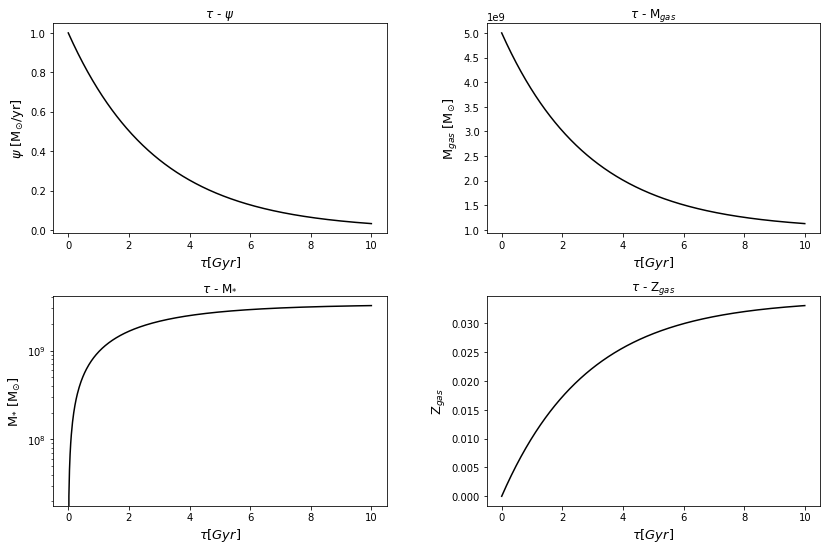

In [2]:
t = np.arange(0., 10e+9 + 20e+6, 20e+6) 

#Breathing-box model
Mgas_bbm = B_box_model(Mg_0, Mzg_0, Zg_0, Mzst_0, Mst_0)[0]
Ms_bbm = B_box_model(Mg_0, Mzg_0, Zg_0, Mzst_0, Mst_0)[1]
Zg_bbm = B_box_model(Mg_0, Mzg_0, Zg_0, Mzst_0, Mst_0)[2]
Mzs_bbm = B_box_model(Mg_0, Mzg_0, Zg_0, Mzst_0, Mst_0)[4]
Zs_bbm = Mzs_bbm/Ms_bbm[1]
sfr_bbm = B_box_model(Mg_0, Mzg_0, Zg_0, Mzst_0, Mst_0)[5]

#plotting 

pl.subplot(221, title = '$\\tau$ - $\psi$')  #star formation rate plot
pl.plot(t/1e+9, sfr_bbm, c = 'k')
pl.xlabel('$\\tau [Gyr]$', fontsize = 13)
pl.ylabel('$\psi$ [M$_{\odot}$/yr]', fontsize = 13)

pl.subplot(222, title = '$\\tau$ - M$_{gas}$')   #gas mass plot 
pl.plot(t/1e+9, Mgas_bbm, c = 'k')
#pl.yscale('log')
pl.xlabel('$\\tau [Gyr]$', fontsize = 13)
pl.ylabel('M$_{gas}$ [M$_{\odot}$]', fontsize = 13)

pl.subplot(223, title = '$\\tau$ - M$_{*}$')   #stellar mass plot
pl.plot(t/1e+9, Ms_bbm[0], c = 'k')
pl.yscale('log')
pl.xlabel('$\\tau [Gyr]$', fontsize = 13)
pl.ylabel('M$_{*}$ [M$_{\odot}$]', fontsize = 13)


pl.subplot(224, title = '$\\tau$ - Z$_{gas}$')   #gas metallicity plot
pl.plot(t/1e+9, Zg_bbm, c = 'k')
pl.xlabel('$\\tau [Gyr]$', fontsize = 13)
pl.ylabel('Z$_{gas}$', fontsize = 13)

pl.subplots_adjust(right = 1.9, top = 1.8, hspace = 0.3, wspace = .3)
pl.show()

/home/xoks/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.
/home/xoks/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':
/home/xoks/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


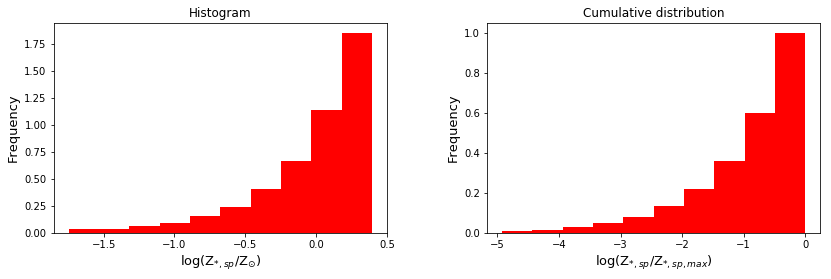

In [3]:
Z_sol = 0.0134            #solar metallicity

pl.subplot(221, title = 'Histogram')
dist = np.log10(Zg_bbm/Z_sol)
dist[np.isinf(dist)] = 0    #the fisrt value of Zg is 0 thus it's log is inf 
pl.hist(dist, density = True, color = 'r', weights = Ms_bbm[1]) #Mst,sp weighted histogram 
pl.xlabel('log(Z$_{*,sp}$/Z$_{\odot}$)', fontsize = 13)
pl.ylabel('Frequency', fontsize = 13)


pl.subplot(222, title = 'Cumulative distribution')
cumlt = np.log(Zg_bbm/np.max(Zg_bbm))
cumlt[np.isinf(cumlt)] = 0             #the fisrt value of Zg is 0 thus it's log is inf 
pl.hist(cumlt, normed = True, color = 'r', cumulative = True, weights = Ms_bbm[1])#weighting the cumultve histgrm
pl.xlabel('log(Z$_{*,sp}$/Z$_{*,sp,max}$)', fontsize = 13)
pl.ylabel('Frequency', fontsize = 13)


pl.subplots_adjust(right = 1.9, top = 1.8, hspace = 0.3, wspace = .3)
pl.show()

For this new star formation the gas mass ends after 10 Gyrs i.e it ends right at the end of the simulation, unlike with the previous case where it would end at about ~ 4 Gyr, this is due to the fact that the rate at which it consumed to form stars decreases, thus after every time step there's more gas to form another sterllar population than in the previous case. On the other hand the metallicity of the gas slowly increases compared to the drastic increase at 4 Gyr of the previous case. This maily result from the ongoing gas mass, thus at each end every time step, the mass of the gas phase metals is diluted (i.e Mz,g/Mg) by the presence of the gas mass.


### $\textit{4a}$

In [4]:
def M_halo(M_h):
    
    b, y, M1, N = 1.376, 0.608, 10**11.59, 0.0351       #initial values
    Mst = Ms_bbm[0][-1]
    diff = Mst - 2*N*M_h*((M_h/M1)**(-b) + (M_h/M1)**y)**(-1)        #Mst - 2*N*Mhalo(......) = 0
                                                                   #if diff == 0 then M_h will be found
    return diff

a = 1e+8     #initial guesses
b = 1e+15


#iterating to approximate DM halo mass through Bisection Method

for i in range(100):    #by monitoring the iterations it converges to the order of 1e-07 after 100 iterations
    
    c = (a + b)/2
    
    if M_halo(a)*M_halo(c) < 0:
        #print('%.3e' %M_halo(c))   #keeping track of the difference of Mst to the relation
        b = c
    
    elif M_halo(b)*M_halo(c) < 0:
        #print('%.3e' %M_halo(c))  #keeping track of the difference of Mst from the relation
        a = c

### $\textit{4b}$

In [5]:
M_h = c               #DM halo mass
Mg = Mgas_bbm[-1]     #total gas mass
Mst = Ms_bbm[0][-1]   #total stellar mass


M_tot = Mg + M_h + Mst     #total mass of the galaxy, sum of halo mass, stellar mass and gas mass
M_b = Mst + Mg             #baryonic mass, sum of stellar mass and gas mass

f_b = M_b/M_tot             #baryon fraction for the model

M_500 = M_tot/1.5
h = 0.673

f_500 = (9.3e-2)*((M_500/2e+14)**(0.21))*(h/0.7)**(-1.5)   #baryonic fraction from observations 

print('baryon ratio = %.4f' %(f_b/f_500))

baryon ratio = 1.2046


### $\textit{4c}$

The ratio of the two baryon fractions suggests that my model is 1.2 times the observations, which I see to be fairly close to the observation value.

### $\textit{5}$

A galactic fountain, this is a scenario in which star formation ejects gas from the disk of the galaxy. This is believed to the one of the main drivers behind evolution of galactic halos, as a result the ejected material moves into the halo, cools and rains back onto the disc ($\textit{Elson 2013}$). 

So the way I would implement this follows directly from the above description, firstly star formation is updated (i.e stars form from the initial amount of gas), then this process of star formation is directly followed by the ejection of gass from the disc (i.e an outflow of gas). Then, accordingly the mass of gas is updated, followed by the outflow of gas from the box. Thereafter, new gas falls into the disc (i.e rains back to the disc of the galaxy). Thus the raining of gas from the halo to the disc is absorbed by the process of the gas falling from outside the box.
